In [67]:
import numpy as np
import pandas as pd

In [68]:
summer = pd.read_csv('https://raw.githubusercontent.com/cads-tedu/DSPG/master/Veri%20Setleri/Olimpiyatlar/summer.csv')
winter = pd.read_csv('https://raw.githubusercontent.com/cads-tedu/DSPG/master/Veri%20Setleri/Olimpiyatlar/winter.csv')
tag = pd.read_csv('https://raw.githubusercontent.com/cads-tedu/DSPG/master/Veri%20Setleri/Olimpiyatlar/dictionary.csv')

In [69]:
summer.rename(columns = {'Country':'Code'}, inplace = True)
winter.rename(columns = {'Country':'Code'}, inplace = True)
tag.rename(columns = {'GDP per Capita':'GDP'}, inplace = True)

In [70]:
#Create our own index for the summer and winter Olympics datasets. This index includes the year and city of the Olympics. 
#For example "1896_Athens"

summer['Indeks'] = summer['Year'].astype('string') + '_' + summer['City'].astype('string')
winter['Indeks'] = winter['Year'].astype('string') + '_' + winter['City'].astype('string')
summer.set_index('Indeks', inplace = True)
winter.set_index('Indeks', inplace = True)

In [71]:
#Form the surnames (words before the comma) in the names of the athletes competing in the summer and winter 
#Olympics to form a new column called "Surname"

def surname(x):
    return x[0]

summer['Surname'] = summer['Athlete'].str.split(',').apply(lambda x: x[0])
winter['Surname'] = winter['Athlete'].str.split(',').apply(lambda x: x[0])

In [72]:
#Missing observations in columns in all datasets

display(summer.isna().sum())
display(winter.isna().sum())
display(tag.isna().sum())


Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Code          4
Gender        0
Event         0
Medal         0
Surname       0
dtype: int64

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Code          0
Gender        0
Event         0
Medal         0
Surname       0
dtype: int64

Country        0
Code           0
Population     5
GDP           25
dtype: int64

In [73]:
#We need to find which country has no population. After that, we look at these variables 
#on https://www.worldometers.info/world-population/population-by-country/ and add to data.

tag[tag['Population'].isna()]
tag.loc[[45,61,139,177], "Population"] = [17564, 3546421, 5101414, 23816775]


In [74]:
#We see that 4 athletes do not have a country code in the summer Olympics. What is the last name of these athletes 
#and the discipline they compete in? Let's select the column of country code, athlete last name and the discipline 
#they competed in and assign it to a new variable named "missing_surname"

missing_surname = summer[['Code', 'Surname', 'Discipline']]
missing_surname[missing_surname['Code'].isna()]

#We see that the names of 3 athletes have not been specified yet, and the country code of 1 athlete has not been entered.

,Code,Surname,Discipline
Indeks,,,
2012_London,NaN,Pending,Athletics
2012_London,NaN,Pending,Weightlifting
2012_London,NaN,Pending,Weightlifting
2012_London,NaN,KUDUKHOV,Wrestling Freestyle


In [75]:
#According to these datasets, in which year were the summer and winter Olympics held for the first and last time?

summer['Year'].max()
summer['Year'].min()
winter['Year'].max()
winter['Year'].min()

#or

summer['Year'].sort_values()[0]
summer['Year'].sort_values()[-1]
winter['Year'].sort_values()[0]
winter['Year'].sort_values()[-1]

2014

In [76]:
#How many summer and winter Olympics have been held so far?

summer['Year'].nunique()
len(summer['Year'].unique())

winter['Year'].nunique()
len(winter['Year'].unique())

22

In [77]:
# In which cities more than 1 Olympics were held in the summer and winter Olympics?

summer.groupby('Year')['City'].unique()[summer.groupby('Year')['City'].unique().duplicated()]
winter.groupby('Year')['City'].unique()[winter.groupby('Year')['City'].unique().duplicated()]

#or

summer.groupby('City').nunique()[summer.groupby('City').nunique().Year > 1]
winter.groupby('City').nunique()[winter.groupby('City').nunique().Year > 1]

,Year,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Surname
City,,,,,,,,,
Innsbruck,2,6,10,330,18,2,29,3,316
Lake Placid,2,6,10,291,20,2,29,3,278
St.Moritz,2,4,9,209,14,2,17,3,189


In [78]:
#What is the number and proportion of male and female athletes competing in the summer Olympics?
summer['Gender'].value_counts()
summer.groupby('Gender')['Gender'].count()
summer['Gender'].value_counts()/len(summer)
summer['Gender'].value_counts(normalize = True)


Men      0.729857
Women    0.270143
Name: Gender, dtype: float64

In [79]:
#What is the number and proportion of male and female athletes competing in the winter Olympics?

winter['Gender'].value_counts()
winter.groupby('Gender')['Gender'].count()
winter['Gender'].value_counts()/len(winter)
winter['Gender'].value_counts(normalize = True)

Men      0.683536
Women    0.316464
Name: Gender, dtype: float64

In [80]:
##What is the number and proportion of male and female athletes competing in the summer and winter Olympics?

pd.crosstab(summer['Gender'], summer['Gender'])

Gender,Men,Women
Gender,,
Men,22746,0
Women,0,8419


In [81]:
#What is the gender distribution of the athletes competing in the "Aquatics" branch in the Olympics 
#held in Athens in the summer Olympics?

summer[(summer['City']=='Athens') & (summer['Sport'] == 'Aquatics')]['Gender'].value_counts(normalize = True)

#or

summer.loc[(summer['City']=='Athens') & (summer['Sport'] == 'Aquatics'), 'Gender'].value_counts(normalize = True)

Women    0.536443
Men      0.463557
Name: Gender, dtype: float64

In [82]:
#How many gold, silver and bronze medals were distributed in which disciplines of which sports branches 
#in the 2014 Winter Olympics held in Sochi?

winter[winter.index == '2014_Sochi'].groupby(['Sport', 'Discipline'])['Medal'].value_counts()

#or

winter.loc["2014_Sochi"].groupby(["Sport", "Discipline"])["Medal"].value_counts()

Sport       Discipline                 Medal 
Biathlon    Biathlon                   Bronze    20
                                       Gold      20
                                       Silver    20
Bobsleigh   Bobsleigh                  Bronze     8
                                       Gold       8
                                       Silver     8
            Skeleton                   Bronze     2
                                       Gold       2
                                       Silver     2
Curling     Curling                    Bronze    10
                                       Gold      10
                                       Silver    10
Ice Hockey  Ice Hockey                 Bronze    46
                                       Gold      46
                                       Silver    46
Luge        Luge                       Bronze     8
                                       Gold       8
                                       Silver     8
Skating     Figure

In [83]:
#Let's combine the summer and winter Olympics data sets on a row basis and assign them to the "olympics" variable.

olympics = summer.merge(winter, how = 'outer')

#or

pd.merge(summer, winter, how = 'outer')

#or

pd.concat([summer, winter], axis = 0)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Surname
Indeks,,,,,,,,,,
1896_Athens,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,HAJOS
1896_Athens,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,HERSCHMANN
1896_Athens,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,DRIVAS
1896_Athens,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,MALOKINIS
1896_Athens,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,CHASAPIS
...,...,...,...,...,...,...,...,...,...,...
2014_Sochi,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,JONES
2014_Sochi,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,ANDERSON
2014_Sochi,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,MALTAIS


In [84]:
#Let's add the country names to the Olympics dataset by using the country codes, matching the country names 
#from the dataset, and adding it again with the name 'Country'.


olympics["Country"] = olympics.merge(tag, on = "Code", how="left")["Country"]

In [85]:
#Do athletes representing their countries win more medals at the Olympics held in their home countries?

countries = pd.DataFrame(olympics.groupby('City')['Country'].value_counts()).rename(columns = {'Country':'Number'}).reset_index()
countries['City'].unique()



array(['Albertville', 'Amsterdam', 'Antwerp', 'Athens', 'Atlanta',
       'Barcelona', 'Beijing', 'Berlin', 'Calgary', 'Chamonix',
       "Cortina d'Ampezzo", 'Garmisch Partenkirchen', 'Grenoble',
       'Helsinki', 'Innsbruck', 'Lake Placid', 'Lillehammer', 'London',
       'Los Angeles', 'Melbourne / Stockholm', 'Mexico', 'Montreal',
       'Moscow', 'Munich', 'Nagano', 'Oslo', 'Paris', 'Rome',
       'Salt Lake City', 'Sapporo', 'Sarajevo', 'Seoul', 'Sochi',
       'Squaw Valley', 'St Louis', 'St.Moritz', 'Stockholm', 'Sydney',
       'Tokyo', 'Turin', 'Vancouver'], dtype=object)

In general the U.S. It is the country that has won the most medals in all Olympics. However, in the Olympics held in Japan, Japan is the country that won the most medals after the USA. The same is true for the Olympics held in Norway. Here, neighboring countries such as Sweden and Finland also performed well in terms of medal counts. So audience support and hosting can be a factor.

In [86]:
#Could there be a relationship between the number of medals won by countries and their gross domestic product?

pd.DataFrame(olympics['Country'].value_counts()).reset_index().rename(columns = {'index':'Country', 'Country':'Medal'}).merge(tag, how = 'right').sort_values('Medal',ascending = False)

#or

olympics.Country.value_counts().to_frame().reset_index().rename(columns={"index":"Country", "Country":"Medal"}).merge(tag, on="Country", how="right").sort_values("Medal", ascending = False)

#Bonus

pd.DataFrame(olympics['Country'].value_counts()).reset_index().rename(columns = {'index':'Country', 'Country':'Medal'}).merge(tag, how = 'right').sort_values('Medal',ascending = False).corr()


,Medal,Population,GDP
Medal,1.000000,0.209118,0.440265
Population,0.209118,1.000000,-0.042539
GDP,0.440265,-0.042539,1.000000


Successful countries also have very high gross domestic product amounts.

In [87]:
#What is the average, median, minimum and maximum gross domestic product of the countries that won more medals 
#than the median value of the medals won by the countries?

gdp = pd.DataFrame(olympics['Country'].value_counts()).reset_index().rename(columns = {'index':'Country', 'Country':'Medal'}).merge(tag, how = 'right').sort_values('Medal',ascending = False)

gdp[gdp['Medal'] > gdp.Medal.median()]['GDP'].agg({'Max_GDP':'max',
                                                      'Min_GDP':'min',
                                                      'Median_GDP':'median',
                                                      'Avg_GDP':'mean'})

#or

gdp[gdp['Medal'] > gdp.Medal.median()].agg(Max_GDP = ('GDP', max),
                                              Min_GDP = ('GDP', min),
                                              Median_GDP = ('GDP', np.median),
                                              Avg_GDP = ('GDP', np.mean))

Max_GDP       80945.079219
Min_GDP         619.169406
Median_GDP    13431.878340
Avg_GDP       20971.807368
Name: GDP, dtype: float64

In [89]:
#In which city and in which sports branches did Turkey win medals?

olympics[olympics.Country == "Turkey"].groupby(["City", "Sport"])["Medal"].size()

City                   Sport        
Athens                 Athletics         1
                       Boxing            1
                       Taekwondo         1
                       Weightlifting     4
                       Wrestling         3
Atlanta                Boxing            1
                       Weightlifting     2
                       Wrestling         3
Barcelona              Judo              1
                       Weightlifting     1
                       Wrestling         4
Beijing                Athletics         2
                       Boxing            1
                       Taekwondo         2
                       Weightlifting     1
                       Wrestling         2
Berlin                 Wrestling         2
Helsinki               Wrestling         3
London                 Athletics         2
                       Taekwondo         2
                       Wrestling        12
Los Angeles            Boxing            2
                 

In [90]:
#or
olympics[olympics['Country'] == 'Turkey'].groupby(['City', 'Sport']).agg(Medal_Number = ('Medal', lambda x: x.count()))

Medal_Number
City                  Sport                      
Athens                Athletics                 1
                      Boxing                    1
                      Taekwondo                 1
                      Weightlifting             4
                      Wrestling                 3
Atlanta               Boxing                    1
                      Weightlifting             2
                      Wrestling                 3
Barcelona             Judo                      1
                      Weightlifting             1
                      Wrestling                 4
Beijing               Athletics                 2
                      Boxing                    1
                      Taekwondo                 2
                      Weightlifting             1
                      Wrestling                 2
Berlin                Wrestling                 2
Helsinki              Wrestling                 3
London                Athletics                 2
                      Taekwondo                 2
                      Wrestling                12
Los Angeles           Boxing                    2
                      Wrestling                 1
Melbourne / Stockholm Wrestling                 7
Mexico                Wrestling                 2
Munich                Wrestling                 1
Rome                  Wrestling                 9
Seoul                 Weightlifting             1
                      Wrestling                 1
Sydney                Judo                      1
                      Taekwondo                 1
                      Weightlifting             1
                      Wrestling                 2
Tokyo                 Wrestling                 6

### Gross Domestic Product Distribution of Countries

<AxesSubplot:>

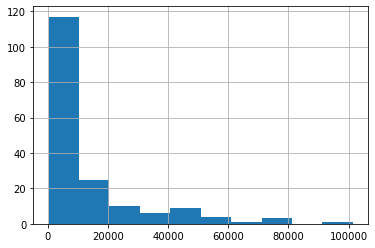

In [91]:
tag.GDP.hist()

<AxesSubplot:xlabel='GDP', ylabel='Medals'>

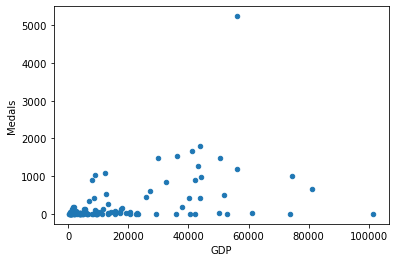

In [92]:
#Scatterplot showing the relationship between the number of medals won by countries and their gross domestic product

gdp_medal = pd.DataFrame(olympics['Country'].value_counts()).reset_index().rename(columns = {'index':'Country', 'Country':'Medals'}).merge(tag, how = 'right').sort_values('Medals',ascending = False)
gdp_medal.plot(x = 'GDP', y = 'Medals', kind = 'scatter')